<a href="https://colab.research.google.com/github/rikdantas/Aprendizagem-de-Maquinas/blob/main/Lista_3/Lista3_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Esse notebook foi criado para a resolução lista 3 da disciplina: DCA0133 - APRENDIZAGEM DE MÁQUINA E MINERAÇÃO DE DADOS

**Aluno: Paulo Ricardo Dantas**

# Questões


## Questão 1
Apresente um trabalho sobre Aprendizagem por Reforço Profundo (Deep Reinforcement Learning). O trabalho deve incluir uma introdução teórica ao tema e a aplicação prática da técnica em um problema específico com descrição do algoritmo utilizado. Inclua os resultados obtidos e uma breve análise do desempenho do agente treinado.

## Questão 2
Considere o problema de análise de componentes principais (PCA), isto é, determinar em uma distribuição de dados as componentes que tenham associadas a elas a maior variância e representar as mesmas no espaço de dados formado pelos autovetores da matriz de correlação. Neste sentido considere o seguinte problema.

A tabela abaixo apresenta os dados relativos a amostras de solo. Para cada amostra, tem-se as medidas das porcentagens de areia (X1), sedimentos (X2), argila (X3) e a quantidade de material orgânico (X4). Da referida tabela obtenha as estatísticas descritivas de cada variável, isto é, a média, a mediana, o desvio padrão, os valores máximo e mínimo.

In [1]:
# Importando bibliotecas
import gdown
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Importando a tabela


In [5]:
url = "https://drive.google.com/uc?id=118I1--Y2ZtLTb7zqNCtlm32bHowQLKJl"
output = "solo_chart.csv"
gdown.download(url, output)

# Lendo o dataset
df = pd.read_csv("solo_chart.csv")

Downloading...
From: https://drive.google.com/uc?id=118I1--Y2ZtLTb7zqNCtlm32bHowQLKJl
To: /content/solo_chart.csv
100%|██████████| 578/578 [00:00<00:00, 1.41MB/s]


In [6]:
# Removendo a coluna "amostra"
df = df.drop(columns=['Amostra'])
df.head()

,Areia (%):X1,Sedimentos(%):X2,Argila(%):X3,Mat. Orgân(%):X4
0,79.9,13.9,6.2,3.3
1,78.5,16.3,7.2,2.5
2,68.9,22.6,8.5,3.6
3,62.2,20.2,17.6,2.8
4,69.2,23.7,7.1,0.9


### a-) Obtenha desta tabela a matriz de correlação.

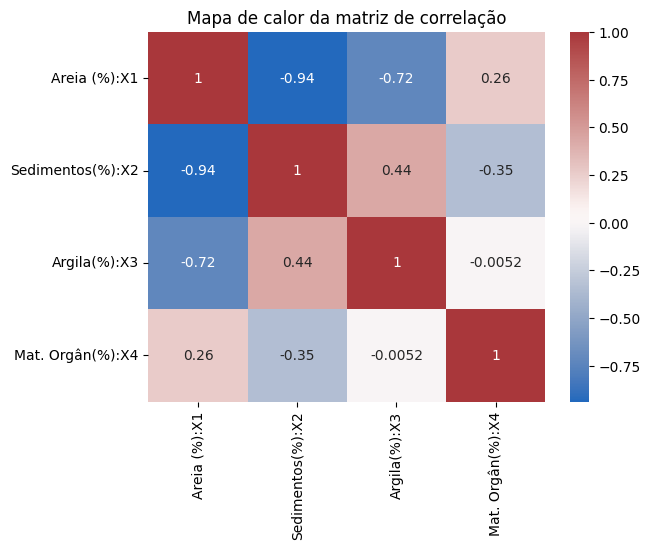

In [15]:
# Calculando a matriz de correlação
matriz_correlacao = df.corr()

# Plotando a matriz de correlação
sns.heatmap(matriz_correlacao, annot=True, cmap='vlag')
plt.title('Mapa de calor da matriz de correlação')
plt.show()

### b-) Desta matriz determine os autovalores ordenados do máximo ao mínimo e os autovetores correspondentes.

In [17]:
# Calcular os autovalores e autovetores
autovalores, autovetores = np.linalg.eig(matriz_correlacao)

#Ordenar os autovalores e autovetores
indices_ordenados = np.argsort(autovalores)[::-1]
autovalores_ordenados = autovalores[indices_ordenados]
autovetores_ordenados = autovetores[:, indices_ordenados]

# Exibir os autovalores ordenados e os autovetores correspondentes
print("Autovalores ordenados:")
print(autovalores_ordenados)

print("\nAutovetores correspondentes:")
print(autovetores_ordenados)

Autovalores ordenados:
[2.50754359e+00 1.01839506e+00 4.72769384e-01 1.29197263e-03]

Autovetores correspondentes:
[[ 0.62402814 -0.09377215 -0.17109737 -0.75665141]
 [-0.57858996 -0.12405612  0.55273948 -0.58679026]
 [-0.46528956  0.48036241 -0.68530201 -0.2883032 ]
 [ 0.24357375  0.86317369  0.44222834 -0.00609116]]


## Questão 3

Considere os dados apresentados na tabela abaixo. Obtenha os centróides dos clusters utilizando o algoritmo K-means. No processo de inicialização considere os itens (a) e (b) abaixo.

In [22]:
# Importando bibliotecas
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

### Importando os dados

In [33]:
# Dados fornecidos
data = {
    'x1': [5.82, -4.68, 3.36, -7.72, -7.64, -6.87, 4.47, 7.73, -7.71, -5.91, 2.18, 6.72, -5.25, -6.94, 7.09, 6.81, -4.19, -5.38, 5.08, 7.27],
    'x2': [-4.58, 2.16, -3.19, 0.88, 3.06, 0.57, -2.62, -2.01, -3.34, -0.49, 3.81, -0.93, -0.26, -1.22, 0.20, 3.17, 4.24, -1.74, 3.30, 0.93],
    'x3': [-1.97, 3.71, 1.09, 1.80, 3.50, -5.45, 5.76, 5.18, -6.33, -5.68, 5.82, -3.04, 0.56, 1.13, 2.25, -4.15, 4.04, 1.43, 5.33, -2.78]
}

# Criar DataFrame
df = pd.DataFrame(data)

### a-) Considere a existência de três clusters nos dados. Inicialize os centróides de forma aleatória.

In [34]:
# Aplicar K-means
kmeans = KMeans(n_clusters=3, init='random', random_state=42).fit(df)

# Obter centróides
centroids = kmeans.cluster_centers_

# Exibir centróides
print("Centróides dos clusters:")
print(centroids)

Centróides dos clusters:
[[ 4.985      -0.085       4.23833333]
 [-6.229       0.386      -0.129     ]
 [ 6.655      -0.3525     -2.985     ]]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


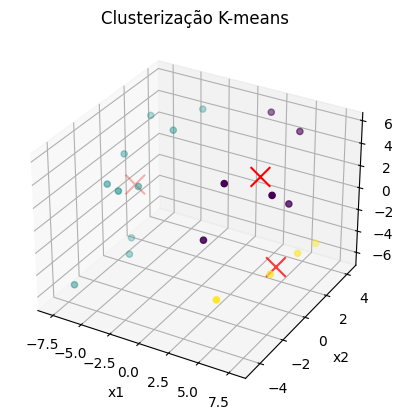

In [35]:
# Adicionar rótulos dos clusters ao DataFrame original
df['Cluster'] = kmeans.labels_

# Visualização
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(df['x1'], df['x2'], df['x3'], c=df['Cluster'], cmap='viridis')
ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], marker='x', color='red', s=200)
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('x3')
plt.title('Clusterização K-means')
plt.show()

### b-) Considere que existam três clusters e a inicialização dos centros seja dada por m1=(0,0,0)t, m2=(1,0,1)t, m3=(-1,1,2)t.

In [37]:
# Inicializar centróides específicos
initial_centroids = np.array([[0, 0, 0], [1, 0, 1], [-1, 1, 2]])

# Aplicar K-means com centróides específicos
kmeans_custom_init = KMeans(n_clusters=3, init=initial_centroids, n_init=1, random_state=42).fit(df[['x1', 'x2', 'x3']])

# Obter centróides
centroids_custom_init = kmeans_custom_init.cluster_centers_

# Exibir centróides
print("Centróides dos clusters:")
print(centroids_custom_init)

Centróides dos clusters:
[[-6.83       -1.08666667 -5.82      ]
 [ 5.653      -0.192       1.349     ]
 [-5.97142857  1.01714286  2.31      ]]


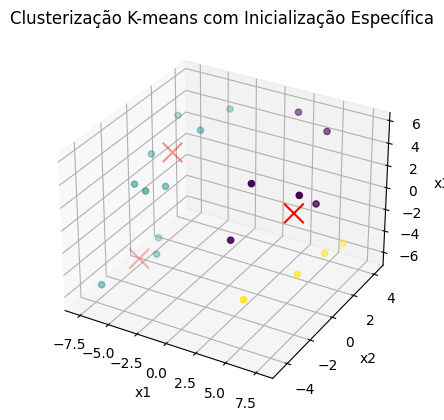

In [41]:
# Adicionar rótulos dos clusters ao DataFrame original
df['Cluster_Custom_Init'] = kmeans_custom_init.labels_

# Gráfico
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(df['x1'], df['x2'], df['x3'], c=df['Cluster'], cmap='viridis')
ax.scatter(centroids_custom_init[:, 0], centroids_custom_init[:, 1], centroids_custom_init[:, 2], marker='x', color='red', s=200)
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('x3')
plt.title('Clusterização K-means com Inicialização Específica')
plt.show()

## Questão 4
Considere dados apresentados na tabela abaixo referentes aos índices de desenvolvimento de países (Fonte: ONU- 2002, Livro – Análise de dados através de
métodos de estatística multivariada – Sueli A. Mingoti) . Utilize uma rede neural de Kohonen ou Mapa Auto Organizável (SOM) para identificar os aglomerados (clusters) dos países com indicadores mais similares. Como sugestão considere um SOM bidimensional com vizinhança hexagonal com 20x20 neurônios.

# Trabalhos


## Trabalho
Apresente um trabalho sobre as técnicas de mineração de dados, caracterizando suas
principais aplicações (e.g. análise de mercado, detecção de fraudes, segmentação de
clientes, análise de redes sociais, etc.) e modelos de aprendizagem comumente
utilizados. Opcionalmente, inclua análise de casos de uso reais e resultados obtidos por
você ou por terceiros.